In [2]:
import warnings
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [3]:
train_path = os.path.join('Datasets', 'bike', 'train.csv')
train_df = pd.read_csv(train_path, parse_dates=['datetime'])

test_path = os.path.join('Datasets', 'bike', 'test.csv')
test_df = pd.read_csv(test_path, parse_dates=['datetime'])

In [4]:
print('Shape:', train_df.shape)
train_df.head()

Shape: (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Data Fields

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* whether the day is neither a weekend nor holiday
* weather 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

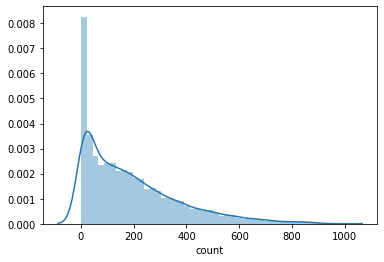

In [5]:
sns.distplot(train_df['count'])

In [6]:
train_df['date'] = train_df['datetime'].dt.date
train_df['time'] = train_df['datetime'].dt.time

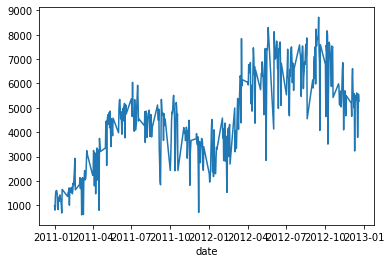

In [7]:
train_df.groupby('date')['count'].sum().plot()
#train_df.groupby('time')['count'].sum().plot()

In [14]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day

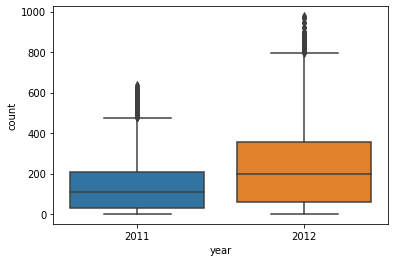

In [17]:
sns.boxplot(x='year', y='count', data=train_df)